## 偏差 （Deviation）

### 带标记的发散型棒棒糖图 （Diverging Lollipop Chart with Markers）

带标记的棒棒糖图通过强调您想要引起注意的任何重要数据点并在图表中适当地给出推理，提供了一种对差异进行可视化的灵活方式。

### 导入所需要的库

In [5]:
import numpy as np              # 导入numpy库
import pandas as pd             # 导入pandas库
import matplotlib as mpl        # 导入matplotlib库
import matplotlib.pyplot as plt
import seaborn as sns           # 导入seaborn库
import matplotlib.patches as patches

### 设定图像各种属性

In [2]:
large = 22; med = 16; small = 12

params = {'axes.titlesize': large,    # 设置子图上的标题字体
            'legend.fontsize': med,     # 设置图例的字体
            'figure.figsize': (16, 10), # 设置图像的画布
           'axes.labelsize': med,      # 设置标签的字体
            'xtick.labelsize': med,     # 设置x轴上的标尺的字体
            'ytick.labelsize': med,     # 设置整个画布的标题字体
          'figure.titlesize': large}  
plt.rcParams.update(params)           # 更新默认属性
plt.style.use('seaborn-whitegrid')    # 设定整体风格
sns.set_style("white")                # 设定整体背景风格

### 测试版本

In [4]:
print(mpl.__version__)
print(sns.__version__)
print(pd.__version__)
print(np.__version__)

3.1.0
0.9.0
0.24.2
1.16.4


### 程序代码

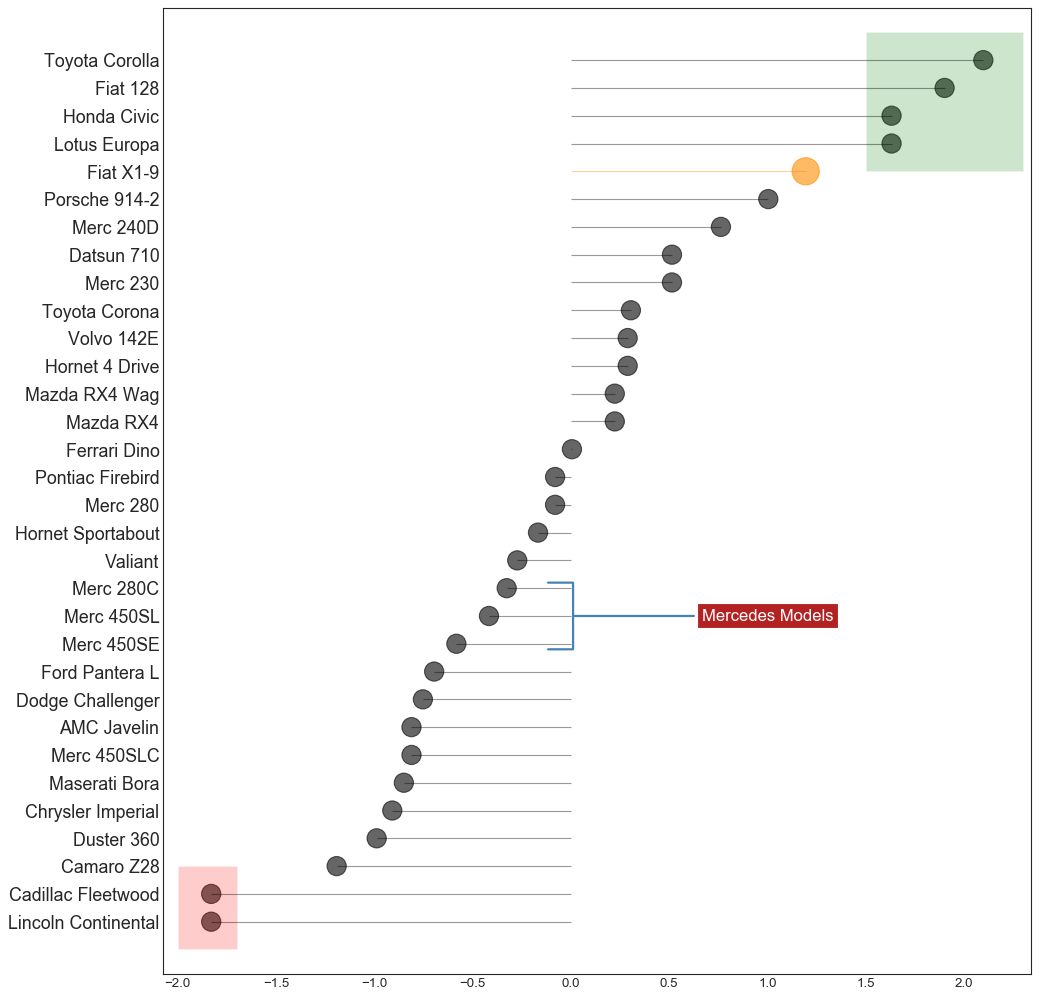

In [21]:
# step1:导入数据
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean()) / x.std()
df['colors'] = 'black'

# step2:改变fiat这一款车的颜色
df.loc[df.cars == 'Fiat X1-9', 'colors'] = 'darkorange'
df.sort_values('mpg_z', inplace = True)
df.reset_index(inplace = True)

# step3 绘制带标记的发散型棒棒糖图
    # 画布
plt.figure(figsize = (14, 16),
          dpi = 80)
    # 条形图
plt.hlines(df.index,             # 将y下标作为绘制直线的位置
           xmin = 0,             # 每一行的开头
           xmax = df.mpg_z,      # 每一行的结尾
          color = df.colors,
          alpha = 0.4,
          linewidth = 1)
    # 散点图
plt.scatter(df.mpg_z,
           df.index,
           color = df.colors,
           s = [600 if x == 'Fiat X1-9' else 300 for x in df.cars],
           alpha = 0.6)
    # y轴坐标
plt.yticks(df.index,
          df.cars)
    # x轴坐标
plt.xticks(fontsize = 12)

# step4:添加注释
plt.annotate('Mercedes Models',                               # 文本内容
            xy = (0.0, 11.0),                                 # 注释的起始位置    
            xytext = (1.0, 11),                               # 文本的起始位置
            xycoords = 'data',                                # xy坐标系
            fontsize = 15,                                    # 文本尺寸
            ha = 'center', va = 'center',                     # 水平对齐，垂直对齐
            bbox = dict(boxstyle = 'square',                  # 箱体的形态为方形
                       fc = 'firebrick'),                     # 箱体的颜色
            arrowprops = dict(arrowstyle = '-[, widthB = 2.0, lengthB = 1.5',  # 箭头的类型，箭头的长度，箭头的宽度
                             lw = 2.0,                        # 箭头的线宽
                             color = 'steelblue'),            # 箭头的颜色
            color = 'white')                                  # 文本的颜色  

# step5:添加补丁
p1 = patches.Rectangle((-2.0, -1),            # 补丁左下角的坐标
                      width = .3,             # 补丁的宽度
                      height = 3,             # 补丁的高度
                      alpha = .2,             # 补丁的透明度
                      facecolor = 'red')      # 补丁内部的颜色
p2 = patches.Rectangle((1.5, 27),           # 补丁左下角的坐标
                      width = .8,             # 补丁的宽度
                      height = 5,             # 补丁的高度
                      alpha = .2,             # 补丁的透明度
                      facecolor = 'green')    # 补丁内部的颜色
plt.gca().add_patch(p1)                       # 获取子图，并且将补丁添加至子图
plt.gca().add_patch(p2)                       # 获取子图，并且将补丁添加至子图

# step6：添加装饰
    # 设置图像标题
plt.title('Diverging Bars of Car Mileage',    # 图像标题名称
          fontdict={'size':20})               # 字体尺寸
    # 设置网格线
plt.grid(linestyle='--',                      # 网格线类型
         alpha=0.5)                           # 网格线透明度
plt.show()                                    # 显示图像